# Transfer Learning using Keras - Monkey Classissifcation - CNN Deep Neural Network

In [1]:
#Import the data
#Let's mount Google Drive So We can Retrieve the Data
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#There is One Zip File of Images - Source Kaggle
!ls "/content/gdrive/My Drive/Images/Monkey Images"

monkey_labels.txt  training.zip  validation.zip


In [3]:
#Unzip the training and validation files. Each will have it's own subdirectory.
#!rm -r *
!unzip -qq '/content/gdrive/My Drive/Images/Monkey Images/training.zip'
!unzip -qq '/content/gdrive/My Drive/Images/Monkey Images/validation.zip'

replace training/n0/n0018.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
replace validation/n0/n000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [4]:
!ls 'training/'

n0  n1	n2  n3	n4  n5	n6  n7	n8  n9


# Examine the Images

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from pandas import DataFrame

In [6]:
#import the monkey.txt to pandas

data = pd.read_csv('/content/gdrive/My Drive/Images/Monkey Images/monkey_labels.txt', sep=',',\
                   skiprows = 1, names=['Label', 'Latin_Name', 'Common_Name', "Train_Images", 'Validation_Images'])
frame = DataFrame(data)
display(frame)
labels = frame['Common_Name']

,Label,Latin_Name,Common_Name,Train_Images,Validation_Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


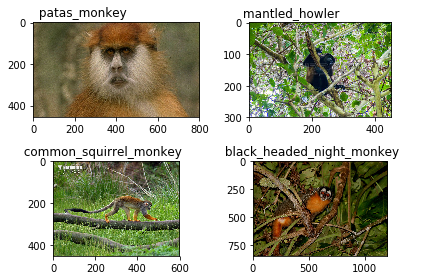

In [7]:
import random
import os

#get all file names in sub-directories    

path = ('./training/')
fname= []
for dirroot, dirnames, filenames in os.walk(path):
  for f in filenames:
    fname.append(os.path.join(dirroot, f))

nameidx = dict(zip(frame.Label.map(str.strip),  frame.Common_Name))

#plot images
for i in range(1,5):
  plt.subplot(2, 2, i)
  rfname = random.choice(fname)
  image = mpimg.imread(rfname)
  plt.imshow(image)
  plt.title(nameidx.get(rfname[11:13]))
  plt.tight_layout()

# Keras

In [8]:
#Keras has a image generator class that can crawl subdirectorys for images. Each subdirectory is a class.

from tensorflow.keras import preprocessing

image_size = 244 #note vgg16 require that pictures be resized to 224 by 224
t_Batch = 32
v_Batch =  10


train_datagen = preprocessing.image.ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    directory=r"./training",
    target_size=(image_size, image_size),
    color_mode="rgb",
    batch_size=t_Batch,
    class_mode="categorical",
    shuffle=True,
    seed=1001
)



validation_datagen = preprocessing.image.ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(
                directory=r"./validation",
                target_size=(image_size, image_size),
                batch_size=v_Batch,
                class_mode='categorical')

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [9]:
#Create Model

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

#model = Sequential()
#model.add(Conv2D(32, (3, 3), padding='same', input_shape=(image_size, image_size, 3), activation="relu"))
#model.add(Conv2D(32, (3, 3), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
#model.add(Conv2D(64, (3, 3), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Flatten())
#model.add(Dense(512, activation="relu"))
#model.add(Dropout(0.5))
#model.add(Dense(10, activation="softmax"))


# Load Keras VGG16 model that was pre-trained against the ImageNet database
num_labels = 10
conv_model = tf.keras.applications.vgg16.VGG16(weights='imagenet',
                                               include_top=False, input_shape=(image_size, image_size, 3))
conv_model.trainable = False #Freeze the VGG16 model, ie. no training

#Add a Dense Layer then an output layer, allow training

model = tf.keras.models.Sequential()
model.add(conv_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(num_labels, activation='softmax'))




W0618 22:46:04.478856 139641090660224 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


58892288/58889256 [==============================] - 2s 0us/step


In [0]:
#compile the model

learning_rate = .00001

model.compile(
    loss='categorical_crossentropy',
    optimizer = tf.keras.optimizers.RMSprop(lr=learning_rate),
    metrics=['accuracy'])

In [11]:
#Fit the model with 15 epochs

epochs = 15

history = model.fit_generator(
    train_generator,
    epochs= epochs,
    validation_data=validation_generator,
    verbose=1)

Epoch 1/15
35/35 [==============================] - 40s 1s/step - loss: 2.4474 - acc: 0.1949 - val_loss: 2.3165 - val_acc: 0.2059
Epoch 2/15
35/35 [==============================] - 29s 837ms/step - loss: 1.5809 - acc: 0.4627 - val_loss: 2.0158 - val_acc: 0.3015
Epoch 3/15
35/35 [==============================] - 29s 842ms/step - loss: 1.1305 - acc: 0.6521 - val_loss: 1.7511 - val_acc: 0.4412
Epoch 4/15
35/35 [==============================] - 30s 846ms/step - loss: 0.8277 - acc: 0.7878 - val_loss: 1.5487 - val_acc: 0.5257
Epoch 5/15
35/35 [==============================] - 30s 844ms/step - loss: 0.6120 - acc: 0.8780 - val_loss: 1.3691 - val_acc: 0.6140
Epoch 6/15
35/35 [==============================] - 29s 842ms/step - loss: 0.4519 - acc: 0.9290 - val_loss: 1.2253 - val_acc: 0.6618
Epoch 7/15
35/35 [==============================] - 30s 858ms/step - loss: 0.3605 - acc: 0.9645 - val_loss: 1.1127 - val_acc: 0.6728
Epoch 8/15
35/35 [==============================] - 29s 840ms/step - los

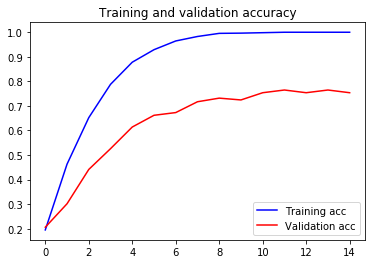

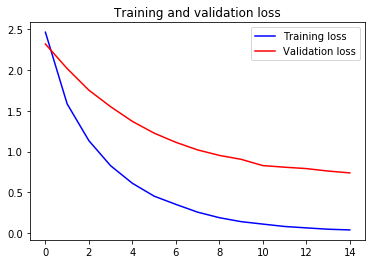

In [12]:
#Check Performance

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

####ANALYSIS

Accuracy on the validation set = 75%. Try Data Augmentation to Improve on the Accuracy.

In [13]:
#Augment the data with Keras built in function

train_datagen = preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rescale=1./255,
    rotation_range=15,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    directory=r"./training",
    target_size=(image_size, image_size),
    color_mode="rgb",
    batch_size=t_Batch,
    class_mode="categorical",
    shuffle=True,
    seed=1001
)


#note the Validataion generator stays exactly the same

Found 1098 images belonging to 10 classes.


In [14]:
#Fit the model with 15 epochs

epochs = 15

history = model.fit_generator(
    train_generator,
    epochs= epochs,
    validation_data=validation_generator,
    verbose=1)

Epoch 1/15


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


35/35 [==============================] - 46s 1s/step - loss: 0.8594 - acc: 0.7459 - val_loss: 0.7170 - val_acc: 0.7537
Epoch 2/15
35/35 [==============================] - 40s 1s/step - loss: 0.8369 - acc: 0.7259 - val_loss: 0.6972 - val_acc: 0.7500
Epoch 3/15
35/35 [==============================] - 40s 1s/step - loss: 0.7525 - acc: 0.7514 - val_loss: 0.6826 - val_acc: 0.7500
Epoch 4/15
35/35 [==============================] - 39s 1s/step - loss: 0.6941 - acc: 0.7750 - val_loss: 0.7183 - val_acc: 0.7647
Epoch 5/15
35/35 [==============================] - 40s 1s/step - loss: 0.6731 - acc: 0.8106 - val_loss: 0.7099 - val_acc: 0.7610
Epoch 6/15
35/35 [==============================] - 39s 1s/step - loss: 0.6517 - acc: 0.7978 - val_loss: 0.6853 - val_acc: 0.7794
Epoch 7/15
35/35 [==============================] - 39s 1s/step - loss: 0.6270 - acc: 0.8069 - val_loss: 0.6662 - val_acc: 0.7904
Epoch 8/15
35/35 [==============================] - 39s 1s/step - loss: 0.5535 - acc: 0.8534 - val_lo

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


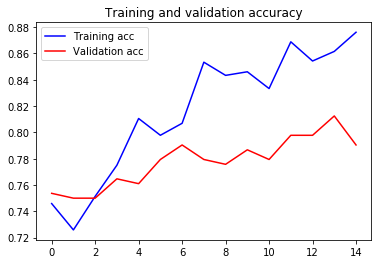

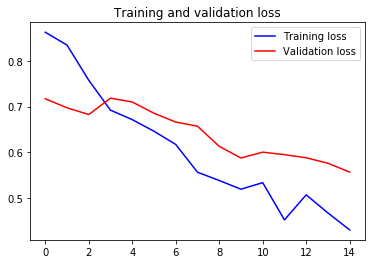

In [15]:
#Check Performance

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

####ANALYSIS

Accuracy increases on the validation set to 80%. Data Augmentation does help.